In [1]:
import torch
import pickle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coco_train = '/home/dk/jyl/Data/COCO2017/coco2017_train.pkl'
coco = pickle.load(open(coco_train, 'rb'))
img_ann = None

In [3]:
for data in coco:
    if data['image_id'] == 361670:
        img_ann = data
        print(data)

{'image_id': 361670, 'categories': ['bottle', 'bottle', 'bottle', 'chair', 'chair', 'chair', 'chair', 'dining table', 'dining table', 'cup', 'cup', 'cup', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'cup', 'cup', 'person', 'chair', 'chair', 'chair', 'chair', 'chair', 'dining table', 'bottle'], 'categories_id': array([39, 39, 39, 56, 56, 56, 56, 60, 60, 41, 41, 41,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 41, 41,  0, 56, 56, 56, 56, 56, 60, 39]), 'bbox': array([[476.39, 238.68,  12.66,  36.11],
       [332.31, 182.27,   4.53,  14.43],
       [195.69, 169.47,   4.9 ,  12.64],
       [491.43, 279.08, 114.03, 130.69],
       [311.78, 300.96, 111.87, 120.04],
       [191.39, 231.08, 100.03, 128.73],
       [345.48, 197.55,  36.65,  48.18],
       [442.1 , 198.45,  60.11,  50.67],
       [254.47, 185.93,  96.38,  12.72],
       [494.67, 247.51,  14.43,  18.69],
       [492.51, 257.9 ,  12.6 ,  20.23],
       [516.06, 258.21,  12.98,  19.66],
  

In [10]:
606.11 * (416 / 640)

393.97150000000005

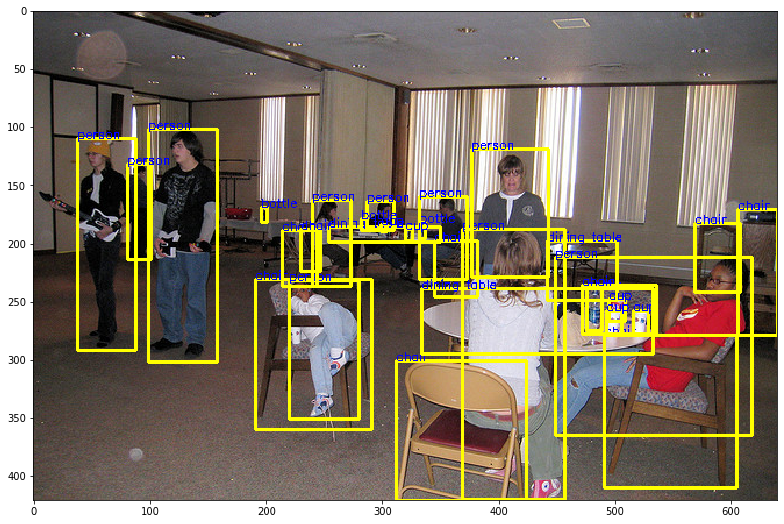

In [18]:
img_path = '/home/dk/jyl/Data/COCO2017/train2017/' + '%012d.jpg' % img_ann['image_id']
img = cv2.imread(img_path)
font = cv2.FONT_ITALIC
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_bbox = np.around(img_ann['bbox']).astype(np.int16)
img_categories = img_ann['categories']

for catNam, box in zip(img_categories, img_bbox):
    cv2.rectangle(img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (255, 255, 0), 2)
    cv2.putText(img, catNam, (box[0], box[1]), font, 0.35, (0, 0, 255), 1)

fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(111)
ax.imshow(img)
plt.show()

In [5]:
import numpy as np
def letterbox_resize(img, bboxes, target_img_size):
    """
    :param img:
    :param bboxes: format [ymax, xmax, ymin, xmin]
    :param target_img_size: [416, 416]
    :return:
        letterbox_img
        resized_bbox: [ymax, xmax, ymin, xmin]
    """
    bboxes = np.asarray(bboxes) if not isinstance(bboxes, np.ndarray) else bboxes
    letterbox_img = np.full(shape=[target_img_size[0], target_img_size[1], 3], fill_value=128, dtype=np.float32)
    org_img_shape = [img.shape[0], img.shape[1]]  # [height, width]
    ratio = np.min([target_img_size[0] / org_img_shape[0], target_img_size[1] / org_img_shape[1]])
    # resized_shape format : [height, width]
    resized_shape = tuple([int(org_img_shape[0] * ratio), int(org_img_shape[1] * ratio)])
    resized_img = cv2.resize(img, resized_shape[::-1])
    dh = target_img_size[0] - resized_shape[0]
    dw = target_img_size[1] - resized_shape[1]
    letterbox_img[(dh//2):(dh//2+resized_shape[0]), (dw//2):(dw//2+resized_shape[1]), :] = resized_img
    resized_bbox = bboxes * ratio
    resized_bbox[:, [0, 2]] += dh // 2
    resized_bbox[:, [1, 3]] += dw // 2
    resized_bbox = np.clip(resized_bbox, 0., target_img_size[0])
    letterbox_img = letterbox_img.astype(np.uint8)
    return letterbox_img, resized_bbox

In [13]:
bboxes = img_ann['bbox']
bbox = [[bbox[1] + bbox[3], bbox[0] + bbox[2], bbox[1], bbox[0]] for bbox in bboxes]
resize_img, resize_bbox = letterbox_resize(img, bbox, [416, 416])

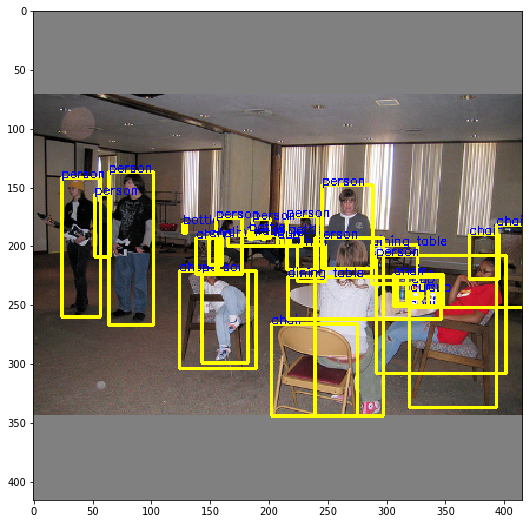

In [21]:
resize_bbox = resize_bbox.astype(np.int16)

for catNam, box in zip(img_categories, resize_bbox):
    cv2.rectangle(resize_img, (box[3], box[2]), (box[1], box[0]), (255, 255, 0), 2)
    cv2.putText(resize_img, catNam, (box[3], box[2]), font, 0.35, (0, 0, 255), 1)

plt.figure(figsize=[16, 9])
plt.imshow(resize_img)
plt.show()

In [22]:
print(resize_bbox)

[[249 317 226 309]
 [198 218 189 216]
 [189 130 181 127]
 [337 393 252 319]
 [344 275 266 202]
 [304 189 221 124]
 [230 248 199 224]
 [232 326 199 287]
 [200 228 191 165]
 [244 330 231 321]
 [251 328 238 320]
 [251 343 238 335]
 [344 297 193 239]
 [219 288 148 245]
 [308 401 208 291]
 [299 182 221 143]
 [267 102 137  64]
 [260  57 142  24]
 [209  65 156  52]
 [220 241 175 215]
 [193 201 177 186]
 [200 211 193 207]
 [194 197 190 194]
 [224 177 176 155]
 [251 348 224 306]
 [228 395 190 370]
 [224 157 193 138]
 [216 160 192 149]
 [252 416 182 393]
 [262 346 226 216]
 [194 186 187 183]]


In [26]:
def yxyx2xywh(bboxes):
    bboxes = np.asarray(bboxes) if not isinstance(bboxes, np.ndarray) else bboxes
    new_bbox = np.zeros_like(bboxes)
    hw = bboxes[:, [0, 1]] - bboxes[:, [2, 3]]
    yx = (bboxes[:, [2, 3]] + bboxes[:, [0, 1]]) / 2  # [center_y, center_x]
    new_bbox[:, [1, 0]] = np.clip(yx, 0., 416)
    new_bbox[:, [3, 2]] = np.clip(hw, 0., 416)
    # [x, y, w, h]
    return new_bbox

In [29]:
grid_ids = yxyx2xywh(resize_bbox) / 32
print(grid_ids[:, [0, 1]])

[[ 9.78125  7.40625]
 [ 6.78125  6.03125]
 [ 4.       5.78125]
 [11.125    9.1875 ]
 [ 7.4375   9.53125]
 [ 4.875    8.1875 ]
 [ 7.375    6.6875 ]
 [ 9.5625   6.71875]
 [ 6.125    6.09375]
 [10.15625  7.40625]
 [10.125    7.625  ]
 [10.59375  7.625  ]
 [ 8.375    8.375  ]
 [ 8.3125   5.71875]
 [10.8125   8.0625 ]
 [ 5.0625   8.125  ]
 [ 2.59375  6.3125 ]
 [ 1.25     6.28125]
 [ 1.8125   5.6875 ]
 [ 7.125    6.15625]
 [ 6.03125  5.78125]
 [ 6.53125  6.125  ]
 [ 6.09375  6.     ]
 [ 5.1875   6.25   ]
 [10.21875  7.40625]
 [11.9375   6.53125]
 [ 4.59375  6.5    ]
 [ 4.8125   6.375  ]
 [12.625    6.78125]
 [ 8.78125  7.625  ]
 [ 5.75     5.9375 ]]


In [33]:
np.around(grid_ids[:, [0, 1]]) - 1

array([[ 9.,  6.],
       [ 6.,  5.],
       [ 3.,  5.],
       [10.,  8.],
       [ 6.,  9.],
       [ 4.,  7.],
       [ 6.,  6.],
       [ 9.,  6.],
       [ 5.,  5.],
       [ 9.,  6.],
       [ 9.,  7.],
       [10.,  7.],
       [ 7.,  7.],
       [ 7.,  5.],
       [10.,  7.],
       [ 4.,  7.],
       [ 2.,  5.],
       [ 0.,  5.],
       [ 1.,  5.],
       [ 6.,  5.],
       [ 5.,  5.],
       [ 6.,  5.],
       [ 5.,  5.],
       [ 4.,  5.],
       [ 9.,  6.],
       [11.,  6.],
       [ 4.,  5.],
       [ 4.,  5.],
       [12.,  6.],
       [ 8.,  7.],
       [ 5.,  5.]])

In [32]:
np.clip(np.around(grid_ids[:, [0, 1]]) - 1, 0, 12)

array([[ 9.,  6.],
       [ 6.,  5.],
       [ 3.,  5.],
       [10.,  8.],
       [ 6.,  9.],
       [ 4.,  7.],
       [ 6.,  6.],
       [ 9.,  6.],
       [ 5.,  5.],
       [ 9.,  6.],
       [ 9.,  7.],
       [10.,  7.],
       [ 7.,  7.],
       [ 7.,  5.],
       [10.,  7.],
       [ 4.,  7.],
       [ 2.,  5.],
       [ 0.,  5.],
       [ 1.,  5.],
       [ 6.,  5.],
       [ 5.,  5.],
       [ 6.,  5.],
       [ 5.,  5.],
       [ 4.,  5.],
       [ 9.,  6.],
       [11.,  6.],
       [ 4.,  5.],
       [ 4.,  5.],
       [12.,  6.],
       [ 8.,  7.],
       [ 5.,  5.]])